# Exploring the Relationship Between Temperature and Crop Yield 
**Tabish Ghouri**
**100916849**

## Introduction
The effects of climate change on agriculture have become an essential area of research, as rising temperatures may affect crop yields and food security. In this analysis, we explore the relationship between temperature and crop yield using a dataset that includes historical data on crop yield data and temperatures for various regions. By examining this data, we look into whether the rising temperature change has a noticeable effect on agricultural productivity and, if so, how significant that relationship is across different crops.  

The dataset used for this analysis is sourced from https://ourworldindata.org/ and includes temperature data collected across several decades alongside crop yield statistics for various agricultural products. 

This analysis aims to explore and understand the patterns and relationship between rising temperatures and their effect on wheat, rice, and maize yields. 

We will focus on the crops wheat, rice and maize, as these are some of the most popular agricultural resources according to the Food and Agriculture Organization of the United Nations, along with a focus on the top-producing countries. Additionally, data from both datasets will focus on the timeline from 1960 onwards. The reason is that this was when scientists first started to worry about climate change and considered it a threat to be aware of. Starting in 1960, it ensures the analysis captures a period during which humans began to play a massive role in the climate crisis, along with increasing advancement in agricultural technology such as the Green Revolution. These factors allow the analysis to show the interplay between climate factors and agricultural productivity. Finally, the countries focused on in this analysis are the top agricultural-producing countries. By examining these countries, the study provides insights and highlights regions where sustainable practices may be critical to mitigate the effect of climate change.


## Analyses

### 1. Imports and Data Loading
The first step involves importing the neccessary libraries, and loading the two CSV datasets:
* **cleaned-temp-anomaly.csv**: Contains data on temperature anomalies across different countries by month
* **cleaned-crop-yields.csv**: Contains crop yield data by year for the crops wheat, rice, and maize 


In [3]:
import pandas as pd  
import matplotlib.pyplot as plt  

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [2]:
d_clean = pd.read_csv('cleaned-temp-anomaly.csv')
d2_clean = pd.read_csv('cleaned-crop-yields.csv')

This step loads the data into pandas DataFrames **d** and **d2** and than displays the first few rows for a preview to make sure everything is going as expected

In [3]:
d_clean.head(), d2_clean.head()

(   Entity Code         Day  Temperature anomaly
 0  Brazil  BRA  1940-01-15            -1.093595
 1  Brazil  BRA  1940-02-15            -1.018908
 2  Brazil  BRA  1940-03-15            -0.921946
 3  Brazil  BRA  1940-04-15            -1.087175
 4  Brazil  BRA  1940-05-15            -0.656849,
   country  year  wheat_yield_gap  rice_yield_gap  maize_yield_gap
 0  Brazil  1961           3.4670          4.2511           3.7477
 1  Brazil  1962           3.0509          4.2911           3.7552
 2  Brazil  1963           3.5055          4.4077           3.7508
 3  Brazil  1964           3.1235          4.4329           3.8994
 4  Brazil  1965           3.2364          4.3090           3.6791)

### 2. Data Cleaning
The **d** dataset contains a column **Day** which we will convert to **Year** to group the data by year. To find the average temperature anomalies, we also group the data by **Country** and **Year**, and rename any neccessary columns for easier reading. The first few rows are then shown for testing purposes.

In [4]:
# from the temperature dataset: extract the months and compute a yearly average
d_clean['Year'] = pd.to_datetime(d_clean['Day']).dt.year

# group by country and year to calculate the yearly average temp 
yearly_temperature = d_clean.groupby(['Entity', 'Year'])['Temperature anomaly'].mean().reset_index().rename(columns={'Entity': 'Country', 'Temperature anomaly': 'Yearly Temperature anomaly'})
yearly_temperature.head()

,Country,Year,Yearly Temperature anomaly
0,Brazil,1940,-0.765970
1,Brazil,1941,-0.408445
2,Brazil,1942,-0.720680
3,Brazil,1943,-1.458899
4,Brazil,1944,-0.696214


### 3. Focus on Popular Crops
Next, we extract crop yield data for the most popular crops (wheat, rice and maize) from the **crop_yields.csv** dataset. The columns are selected and renamed for consistency along with the first few rows being shown for testing purposes.

In [5]:
# next want to focus on the most popular crops from the dataset
popular_crops = ['wheat_yield_gap', 'rice_yield_gap', 'maize_yield_gap']
crop_yield = d2_clean[['country', 'year'] + popular_crops]
crop_yield.head()

,country,year,wheat_yield_gap,rice_yield_gap,maize_yield_gap
0,Brazil,1961,3.4670,4.2511,3.7477
1,Brazil,1962,3.0509,4.2911,3.7552
2,Brazil,1963,3.5055,4.4077,3.7508
3,Brazil,1964,3.1235,4.4329,3.8994
4,Brazil,1965,3.2364,4.3090,3.6791


### 4. Merging the Datasets
To analyze the relationship between temperature and crop yields, I merged the two datasets. Before merging, I filtered the datasets to include data from 1960 and onwards, and then determined the range of overlapping years between the two datasets. This ensure we are only analyzing common years between the datasets, and fix the mismatch of years that was present beforehand. After filtering, I merged the datasets using common columns **Year** and **Country**. After merging, the resulting dataset contains temperature anomalies and crop yields for each country and year. The first few rows are than shown for testing purposes.

In [6]:
# now want to fix the mismatch of years and also merge the them into a new dataset consisting of country, year, temp, and the crop yields of wheat, rice, and corn
# merge the processed datasets on country and year
# determine the range of overlapping years, then filter both datasets to the overlapping years and then merge

# start from 1960
yearly_temperature = yearly_temperature[yearly_temperature['Year'] >= 1960]
crop_yield = crop_yield[crop_yield['year'] >= 1960]

# Step 1: Determine the range of overlapping years
max_start_year = max(yearly_temperature['Year'].min(), crop_yield['year'].min())
min_end_year = min(yearly_temperature['Year'].max(), crop_yield['year'].max())

# Step 2: Filter both datasets to the overlapping years
filtered_temp = yearly_temperature[(yearly_temperature['Year'] >= max_start_year) & (yearly_temperature['Year'] <= min_end_year)]
filtered_crops = crop_yield[(crop_yield['year'] >= max_start_year) & (crop_yield['year'] <= min_end_year)]

# Step 3: Merge the datasets on year
merged_data = pd.merge(filtered_temp, filtered_crops, left_on=['Year', 'Country'], right_on=['year', 'country'])  

# Drop redundant columns if needed
merged_data.drop(columns=['year', 'country'], inplace=True)

# Preview the merged dataset
merged_data.head()


,Country,Year,Yearly Temperature anomaly,wheat_yield_gap,rice_yield_gap,maize_yield_gap
0,Brazil,1961,-0.037416,3.4670,4.2511,3.7477
1,Brazil,1962,-0.762119,3.0509,4.2911,3.7552
2,Brazil,1963,-0.111046,3.5055,4.4077,3.7508
3,Brazil,1964,-0.995527,3.1235,4.4329,3.8994
4,Brazil,1965,-0.814391,3.2364,4.3090,3.6791


### 5. Focus on Top-Producing Agricultural Countries
To analyze specific countries that are top producer, I filtered the dataset to include data for the following countries: **United States, China, India, Netherlands, and Brazil**. This step allows me to have a more targeted analysis, making the data easier to understand and manage. The first few rows are than shown for testing purposes.

In [7]:
# after creating the merged dataset with the proper temp and years, now focus on countries
# https://www.investopedia.com/financial-edge/0712/top-agricultural-producing-countries.aspx
agri_powerhouses = ['Brazil', 'China', 'India', 'Netherlands', 'United States']
powerhouse_data = merged_data[merged_data['Country'].isin(agri_powerhouses)]

powerhouse_data.head()

,Country,Year,Yearly Temperature anomaly,wheat_yield_gap,rice_yield_gap,maize_yield_gap
0,Brazil,1961,-0.037416,3.4670,4.2511,3.7477
1,Brazil,1962,-0.762119,3.0509,4.2911,3.7552
2,Brazil,1963,-0.111046,3.5055,4.4077,3.7508
3,Brazil,1964,-0.995527,3.1235,4.4329,3.8994
4,Brazil,1965,-0.814391,3.2364,4.3090,3.6791


### 6. Generated Plots
The plot shows temperature anomisles on the left y-axis and crop yields for wheat, rie, and maize on the right y-axis, along with a legend on the top left and right.
In the plots:
* The **red** line represents the **temperature anomaly** in Celcius over time
* The **green, blue, and yellow** lines reprense the **wheat, rice and maize** respectively

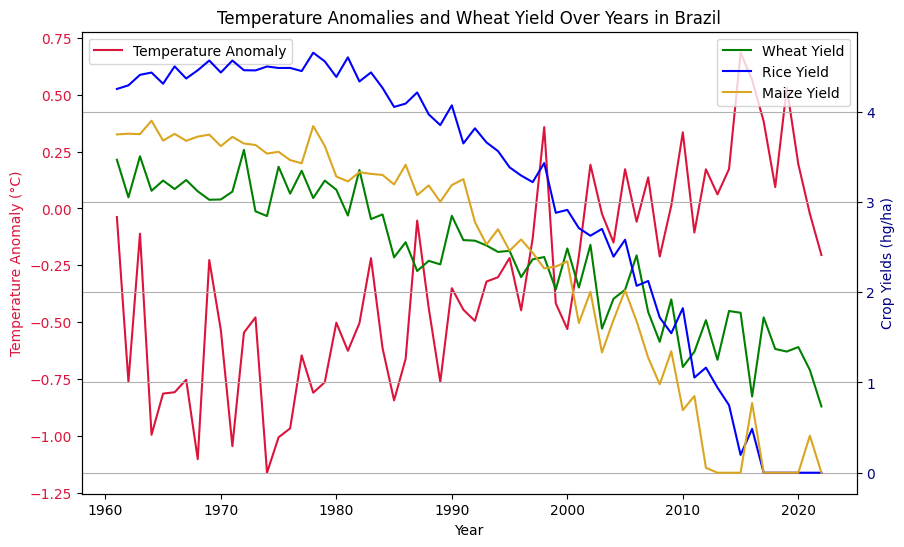

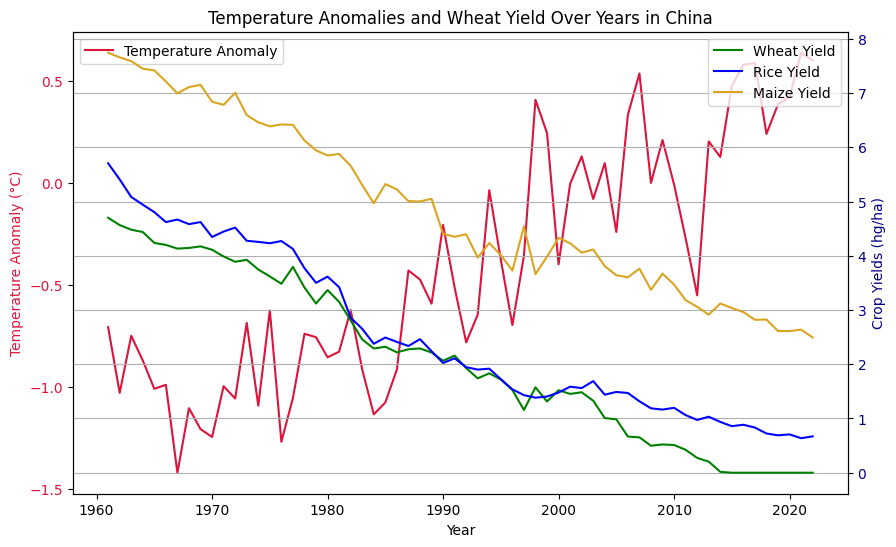

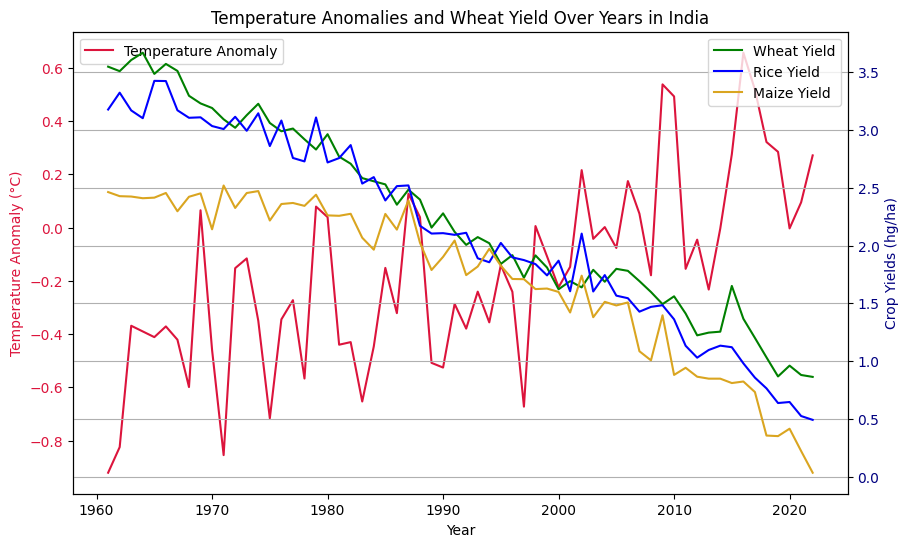

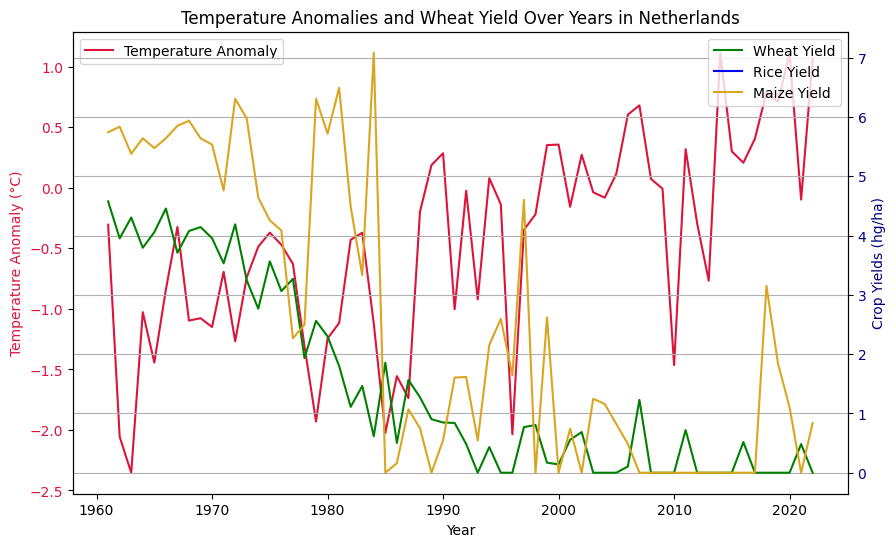

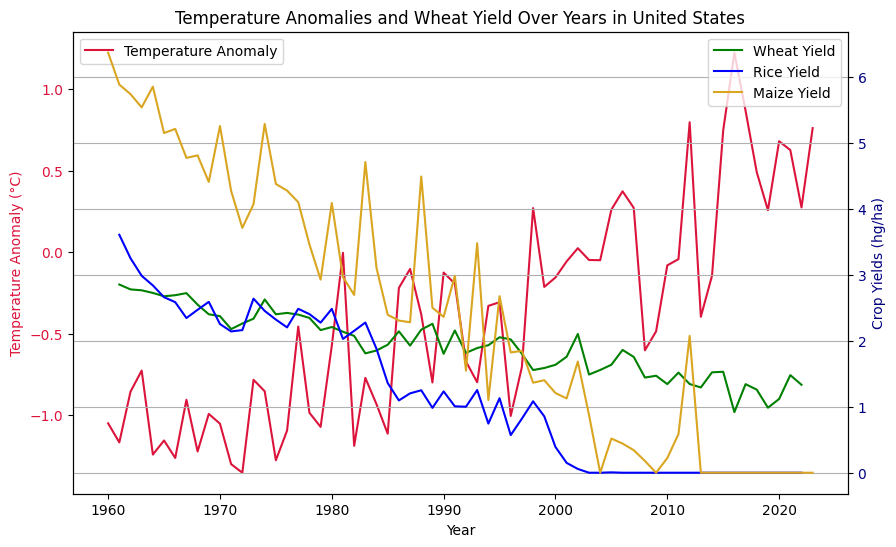

In [8]:
# want to go through each powerhouse country 
# filter the powerhouse_data rows where the Country match the one in the loop
# then create the plots

for country in agri_powerhouses:
    country_data = powerhouse_data[powerhouse_data['Country'] == country]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Temperature vs. Year
    ax1.plot(country_data['Year'], country_data['Yearly Temperature anomaly'], color='crimson', label='Temperature Anomaly')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Temperature Anomaly (°C)', color='crimson')
    ax1.tick_params(axis='y', labelcolor='crimson')

    # Yield vs. Year (secondary y-axis)
    ax2 = ax1.twinx()
    ax2.plot(country_data['Year'], country_data['wheat_yield_gap'], color='green', label='Wheat Yield')
    ax2.plot(country_data['Year'], country_data['rice_yield_gap'], color='blue', label='Rice Yield')
    ax2.plot(country_data['Year'], country_data['maize_yield_gap'], color='goldenrod', label='Maize Yield')
    ax2.set_ylabel('Crop Yields (hg/ha)', color='navy')
    ax2.tick_params(axis='y', labelcolor='navy')

    plt.title(f'Temperature Anomalies and Wheat Yield Over Years in {country}')
    plt.grid(True)
    ax1.legend()
    ax2.legend()
    plt.show()


In [9]:
# calculate correlations between temperature anomaly and crop yield gaps
correlations = merged_data[['Yearly Temperature anomaly', 'wheat_yield_gap', 'rice_yield_gap', 'maize_yield_gap']].corr()
# print(correlations)

temp_corr_wheat = correlations.loc['Yearly Temperature anomaly', 'wheat_yield_gap']
temp_corr_rice = correlations.loc['Yearly Temperature anomaly', 'rice_yield_gap']
temp_corr_maize = correlations.loc['Yearly Temperature anomaly', 'maize_yield_gap']

print(f"Correlation between Temperature Anomaly and Wheat Yield Gap: {temp_corr_wheat:.2f}")
print(f"Correlation between Temperature Anomaly and Rice Yield Gap: {temp_corr_rice:.2f}")
print(f"Correlation between Temperature Anomaly and Maize Yield Gap: {temp_corr_maize:.2f}")


Correlation between Temperature Anomaly and Wheat Yield Gap: -0.57
Correlation between Temperature Anomaly and Rice Yield Gap: -0.63
Correlation between Temperature Anomaly and Maize Yield Gap: -0.60


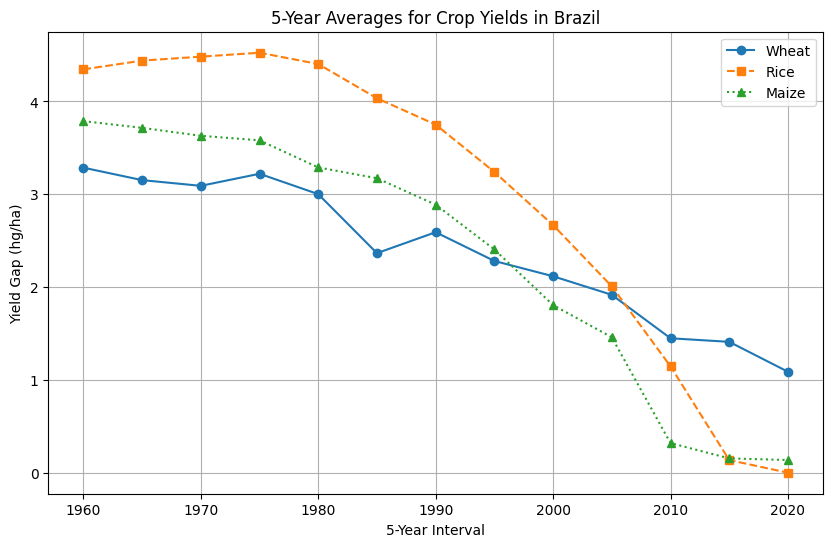

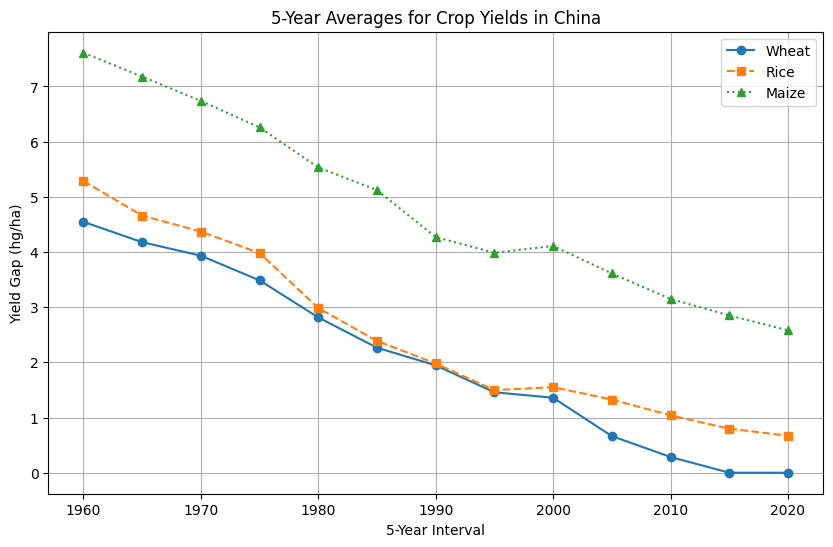

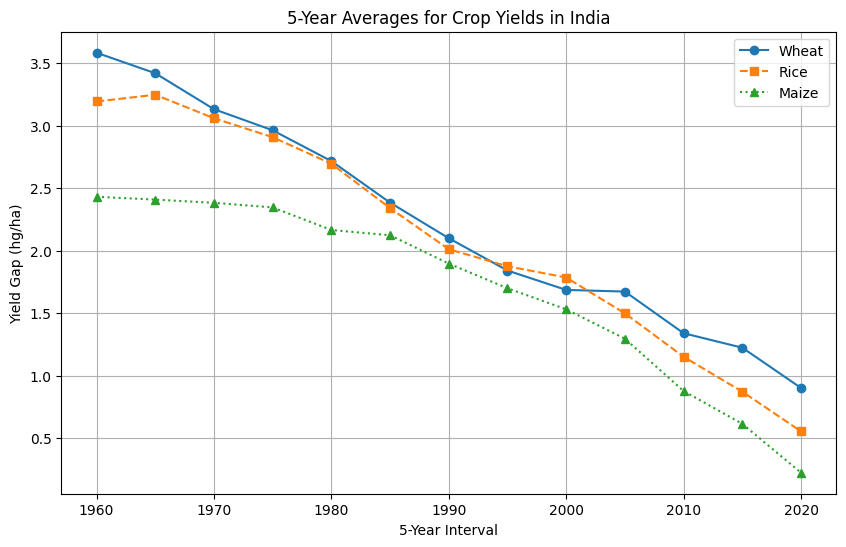

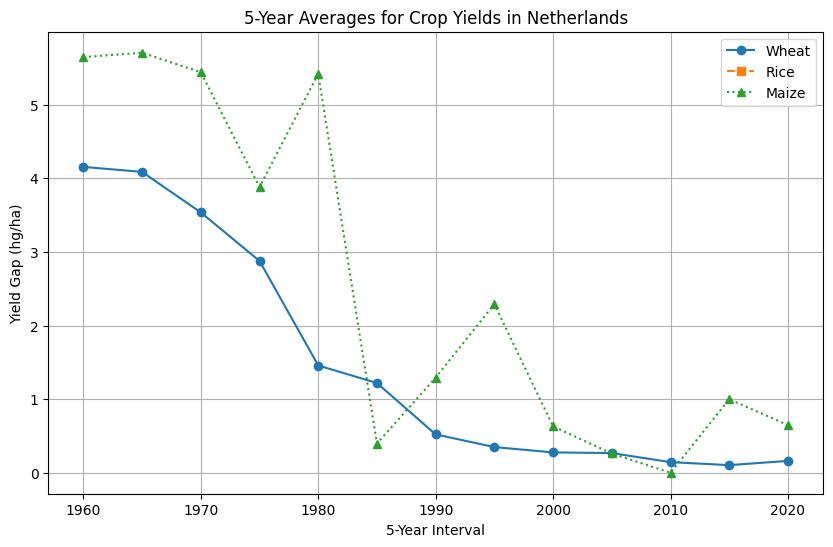

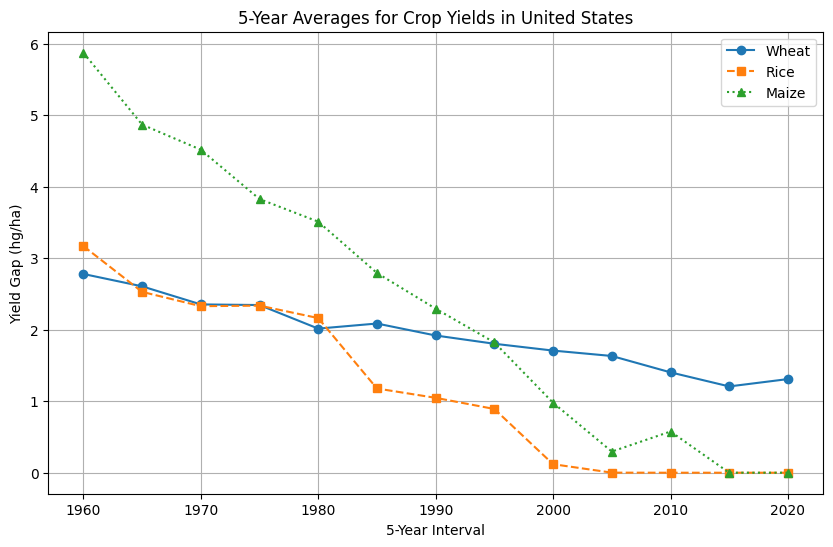

In [10]:

merged_data['five_year_interval'] = (merged_data['Year'] // 5) * 5

# group by country and 5-year interval
five_year_averages = (
    merged_data.groupby(['Country', 'five_year_interval'])
               .mean(numeric_only=True)
               .reset_index()
)

# plot 5-year averages for wheat, rice, and maize yields for each country
for country in merged_data['Country'].unique():
    country_data = five_year_averages[five_year_averages['Country'] == country]
    
    # new figure for each country
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # data for each crop
    ax.plot(country_data['five_year_interval'], country_data['wheat_yield_gap'], label='Wheat', marker='o')
    ax.plot(country_data['five_year_interval'], country_data['rice_yield_gap'], label='Rice', marker='s', linestyle='--')
    ax.plot(country_data['five_year_interval'], country_data['maize_yield_gap'], label='Maize', marker='^', linestyle=':')
    
    ax.set_xlabel('5-Year Interval')
    ax.set_ylabel('Yield Gap (hg/ha)')
    ax.set_title(f'5-Year Averages for Crop Yields in {country}')
    ax.legend(loc='upper right')
    ax.grid(True)
    
    plt.show()


## Discussion



As shown in the first five graphs, it is apparent that rising temperatures are associated with declining crop yields. The negative correlation between temperature anomalies and crop yields is evident across wheat, rice, and maize. 

The correlation between temperature anomaly and crop yields is as follows:
* **Wheat Yield Gap and Temperature Anomaly:** -0.57
* **Rice Yield Gap and Temperature Anomaly:** -0.63
* **Maize Yield Gap and Temperature Anomaly:** -0.60

These values range from -0.57 to -0.63, indicating a solid inverse relationship between temperature anomalies and crop yields. This relationship suggests higher temperature anomalies are consistently associated with lower crop yields across wheat, rice, and maize.

These values, ranging from -0.57 to -0.63, indicate a strong inverse relationship between temperature anomalies and crop yields. Higher temperature anomalies consistently lead to lower yields for these crops.


Looking at the 5-year averages, it is apparent that crop yields have declined significantly as we approach the present. Combined with the rising temperature trends shown earlier, the data further suggests that increasing temperature has had a substantial negative impact on agricultural productivity.

Temperatures affect crop yield due to several factors. Heat stress can disrupt processes such as photosynthesis and flowering, reducing overall yields. Increasing temperatures lead to increased water loss by evaporation from the soil surface and transpiration from the leaves of the plants. This stresses growing plants, especially in regions related to rainfed agriculture, such as Brazil. Temperate also negatively affects crop yields because of increased pest and disease activity. 

The negative impact of increasing temperature and declining crop yields leads to problems regarding food security. The decline in crop yields alone threatens regions heavily dependent on these staple crops, leading to increased disease and starvation. Additionally, countries reliant on selling these crops will suffer economically, causing an increase in poverty in farming areas. 

The data shows a negative correlation between rising temperatures and declining crop yields. The implications of this are significant and concerning. A decrease in crop yields threatens food security and the economic status of countries and their people. These findings highlight the urgency of addressing climate change and its effects on agriculture. Immediate action and strategies to mitigate rising temperatures and strengthen farming practices will be essential to protect food security while combating climate change.

## References


1. Data from: https://ourworldindata.org/
2. Pandas for data manipulation
3. Matplotlib for data visualization


https://ourworldindata.org/crop-yields
https://ourworldindata.org/temperature-anomaly
https://www.investopedia.com/financial-edge/0712/top-agricultural-producing-countries.aspx
